C:\Users\Info Soft Solution\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


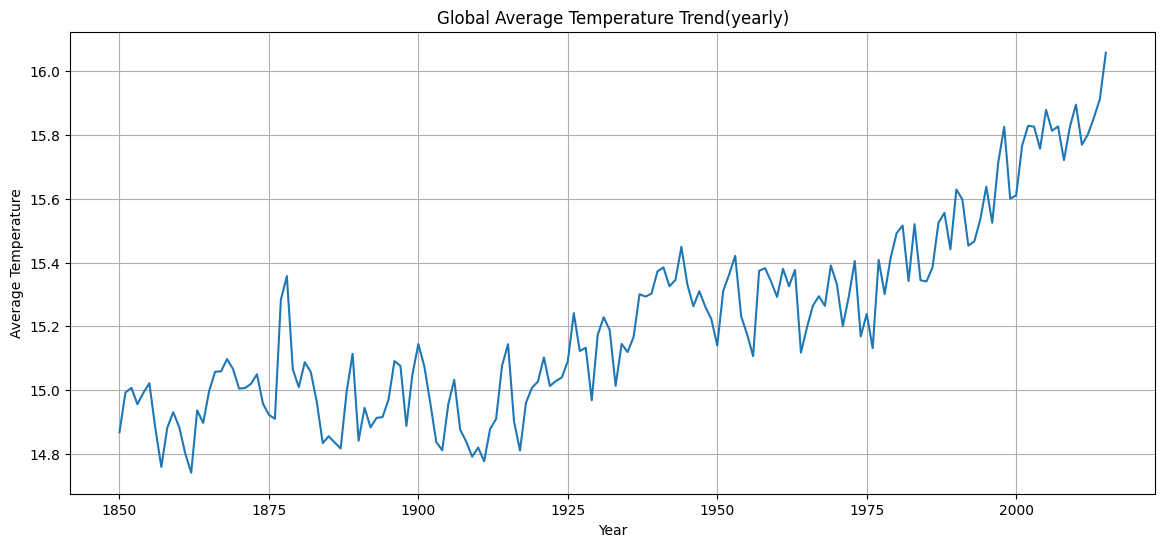

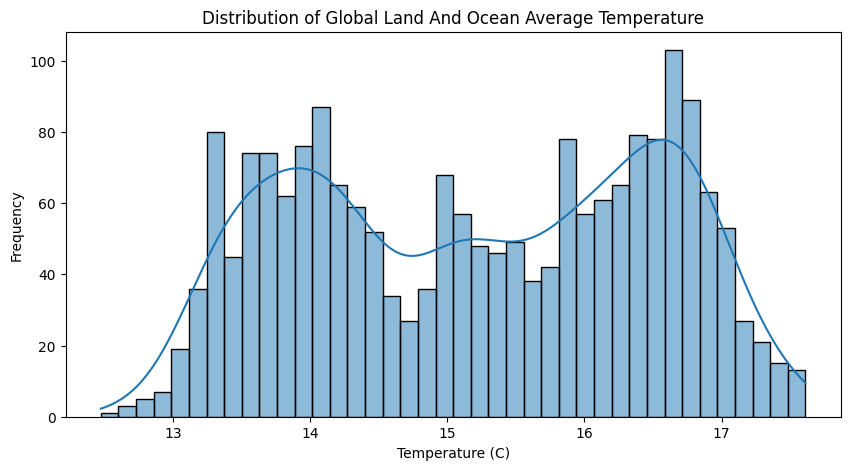

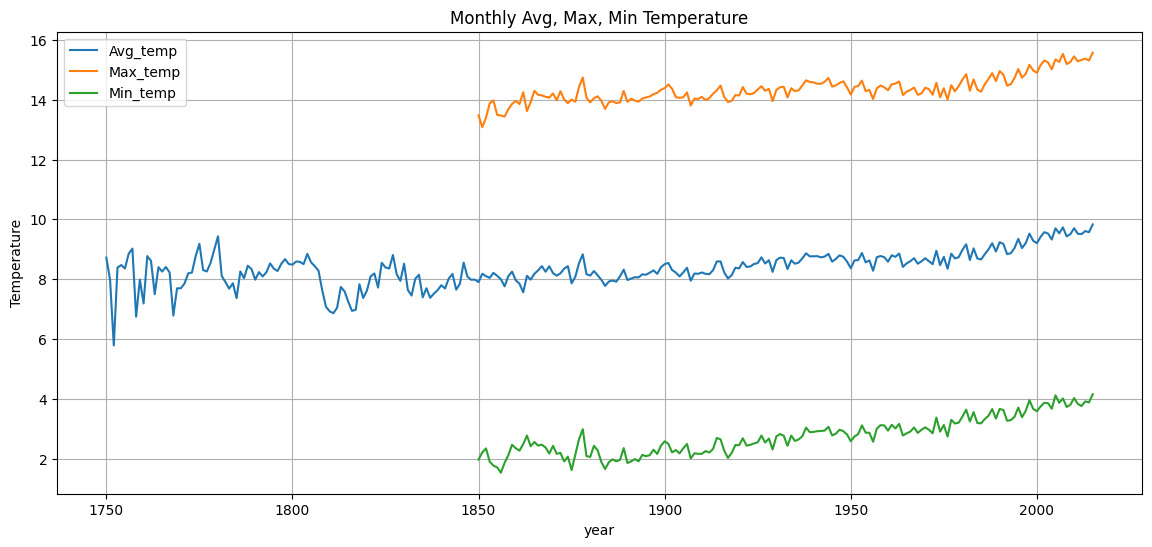

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3180 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              3180 non-null   object        
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              3180 non-null   object        
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  3180 non-null   object        
 9   year               

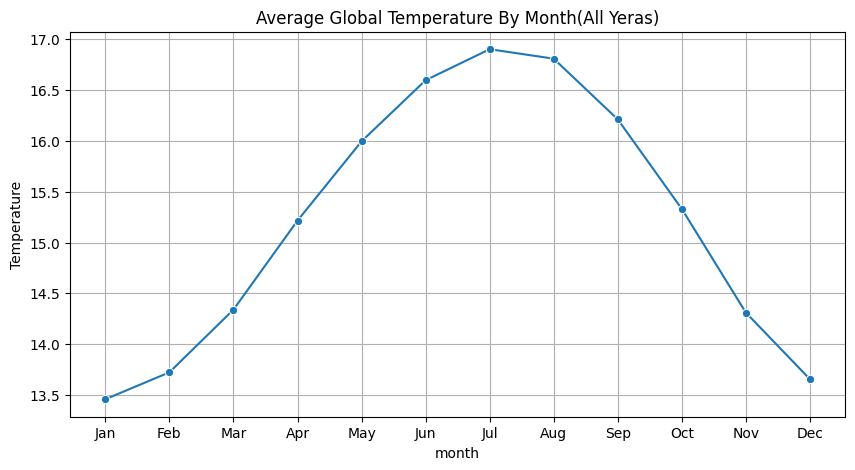

In [32]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connecting mysql database
conn = mysql.connector.connect(
    host = 'localhost', 
    user = 'root',
    password = 'Chathudissa@1235',
    database ='Global_warming')

query = "SELECT * FROM globaltemperatures;"
df = pd.read_sql(query,conn)
conn.close()
#df.info()
#df.head()

df['dt'] = pd.to_datetime(df['dt']) # convert date column to date time
df.isnull().sum() # find the nuul values

# yearly temperature trends
df['LandAndOceanAverageTemperature'] = pd.to_numeric(df['LandAndOceanAverageTemperature'], errors='coerce') #convert string data to numeric data
df['year'] = df['dt'].dt.year #extract the year

yearly_temp = df.groupby('year')['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize =(14,6))
sns.lineplot(x='year' , y = 'LandAndOceanAverageTemperature', data=yearly_temp)
plt.title("Global Average Temperature Trend(yearly)")
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

#temperature distribution
plt.figure(figsize =(10,5))
sns.histplot(df['LandAndOceanAverageTemperature'], bins=40,kde =True)
plt.title("Distribution of Global Land And Ocean Average Temperature")
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

df['LandAverageTemperature'] = pd.to_numeric(df['LandAverageTemperature'], errors='coerce')#convert string data to numeric data
df['LandMaxTemperature'] = pd.to_numeric(df['LandMaxTemperature'], errors='coerce')#convert string data to numeric data
df['LandMinTemperature'] = pd.to_numeric(df['LandMinTemperature'], errors='coerce')#convert string data to numeric data

monthly_avg = df.groupby('year')[['LandAverageTemperature','LandMaxTemperature','LandMinTemperature']].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data= monthly_avg , x='year', y='LandAverageTemperature', label = 'Avg_temp')
sns.lineplot(data= monthly_avg , x='year', y='LandMaxTemperature', label = 'Max_temp')
sns.lineplot(data= monthly_avg , x='year', y='LandMinTemperature', label = 'Min_temp')
plt.title('Monthly Avg, Max, Min Temperature')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

df.info()

#montly trend analysis
df['month'] =df['dt'].dt.month
monthly_avg_temp = df.groupby('month')['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='LandAndOceanAverageTemperature', data=monthly_avg_temp, marker ='o')
plt.title("Average Global Temperature By Month(All Yeras)")
plt.xlabel('month')
plt.ylabel('Temperature')
plt.xticks(ticks=range(1,13), labels =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

